<a href="https://colab.research.google.com/github/njafarov/Optimization_MILP/blob/main/Travelling_Salesman_Problem_(MILP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyomo
!pip install cplex -q

import pyomo.environ as pyo
from pyomo.opt import SolverFactory
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 6.8 MB/s 
     |████████████████████████████████| 49 kB 7.0 MB/s 
     |████████████████████████████████| 43.3 MB 1.8 MB/s 


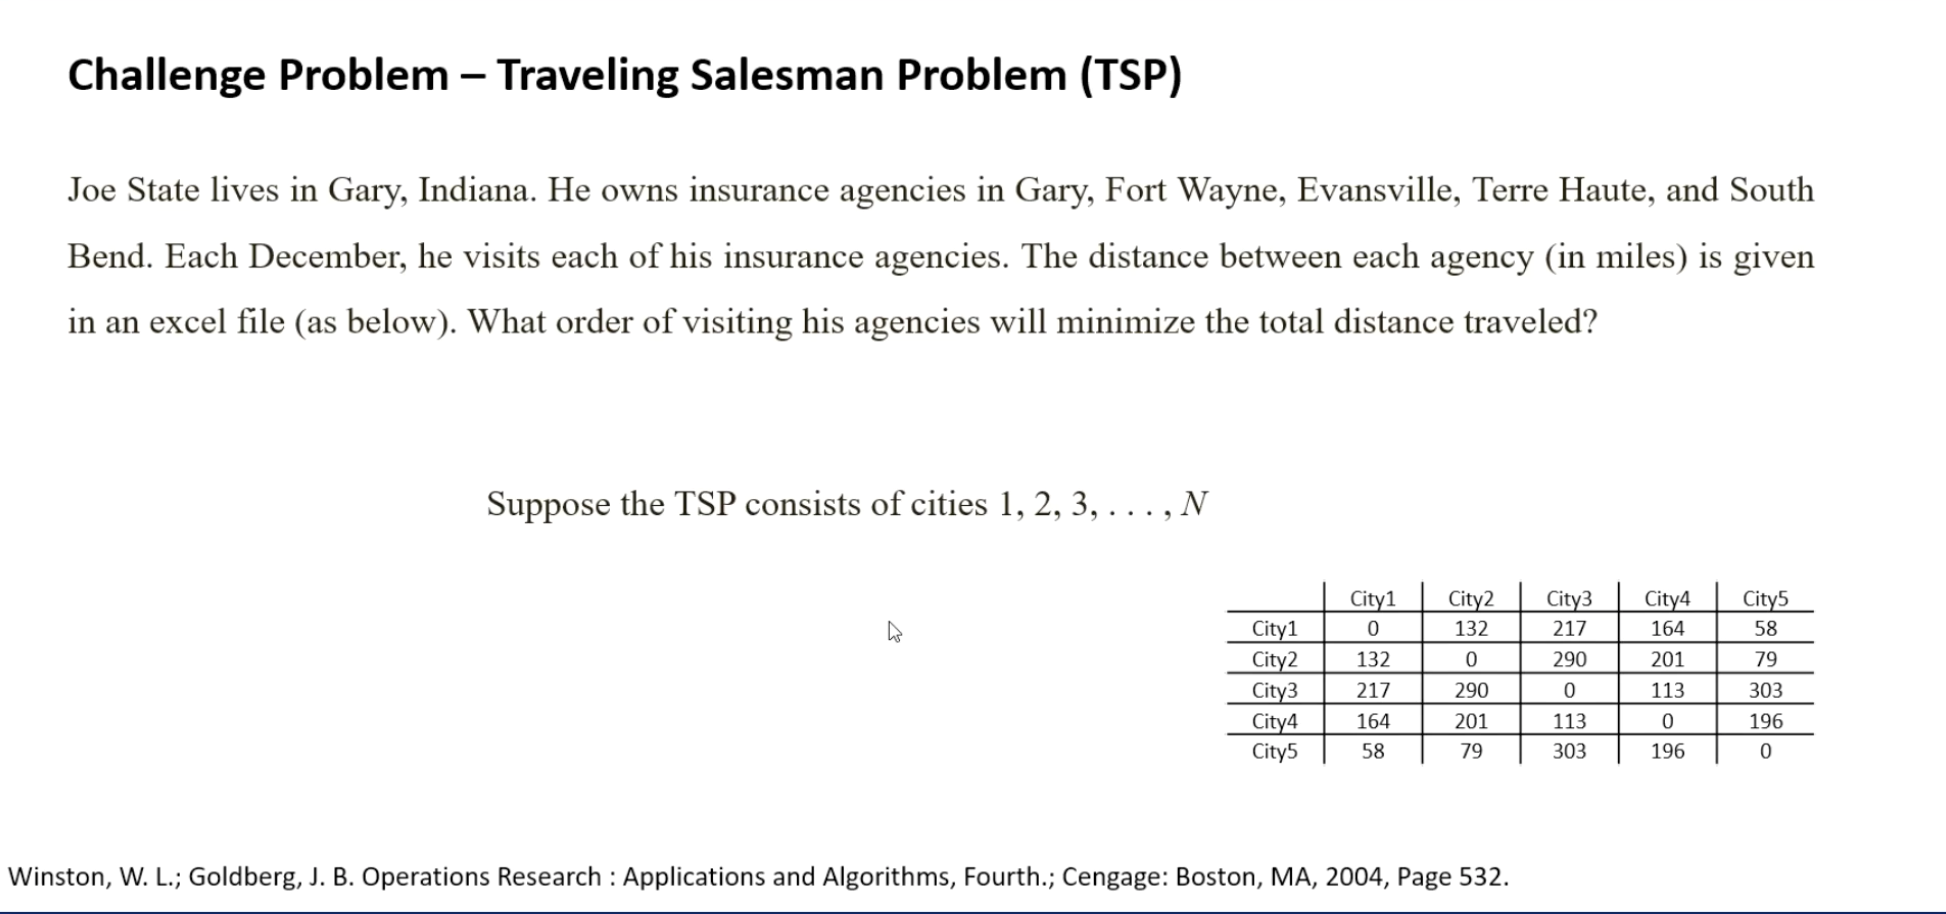

In [ ]:
# Model
model = pyo.ConcreteModel()

# Sets
model.i = pyo.Set(initialize=['City1','City2','City3','City4','City5'])
model.j = pyo.Set(initialize=['City1','City2','City3','City4','City5'])

model.ii = pyo.Set(initialize=['City2','City3','City4','City5'])

# Parameters
C = pd.read_excel('S5P3_Data.xlsx',sheet_name='TSP',header=0,index_col=0,usecols='A:F', nrows=5)

# Decision Variables
model.x = pyo.Var(model.i, model.j, domain=pyo.Binary)
x = model.x

model.u = pyo.Var(model.ii, domain=pyo.NonNegativeReals)
u = model.u

# Objective Function
def objective_function(model):
  return sum(sum(C[i][j]*x[i,j]for i in model.i) for j in model.j)
model.Obj = pyo.Objective(rule=objective_function, sense=pyo.minimize)

# Constrains
def cons1(model,j):
  return sum(x[i,j] for i in model.i)==1
model.Cons1 = pyo.Constraint(model.i, rule = cons1)

def cons2(model,i):
  return sum(x[i,j] for j in model.j)==1
model.Cons2 = pyo.Constraint(model.j, rule = cons2)

def cons3(model,i,j):
  if i!=j:
    return u[i]-u[j]+5*x[i,j]<=4
  else:
    return u[i]-u[i]==0
model.Cons3 = pyo.Constraint(model.ii,model.ii, rule=cons3)


Solver = SolverFactory('cplex_direct')
results = Solver.solve(model)

print(results)
print(" Objective Function: ", model.Obj())

for i in model.i:
  for j in model.j:
    if x[i,j]()==1:
      print("Salesman goes from ",i,'to ',j)
    else:
      print('---')




Problem: 
- Name: 
  Lower bound: 668.0
  Upper bound: 668.0
  Number of objectives: 1
  Number of constraints: 26
  Number of variables: 29
  Number of binary variables: 25
  Number of integer variables: 0
  Number of continuous variables: 4
  Number of nonzeros: None
  Sense: 1
Solver: 
- Name: CPLEX 22.1.0.0
  Status: ok
  Wallclock time: 0.005396366119384766
  Termination condition: optimal
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

 Objective Function:  668.0
---
---
Salesman goes from  City1 to  City3
---
---
---
---
---
---
Salesman goes from  City2 to  City5
---
---
---
Salesman goes from  City3 to  City4
---
---
Salesman goes from  City4 to  City2
---
---
---
Salesman goes from  City5 to  City1
---
---
---
---
